# 3.1 - Data Cleaning


![cleaning](images/cleaning.jpg)


$$$$

Una vez que hemos conseguido los datos necesarios, es necesario observar su calidad y orden. No se trata de un análisis exploratorio de los datos, sino de ver como de sucios y desordenados están nuestros datos. Cuando los datos tienen problemas de calidad decimos que los datos están sucios. Los problemas de calidad están relacionados con valores nulos, datos inconsistentes, tipo de dato incorrecto y registros duplicados. 


$$$$
![assess](images/data_assess.png)
$$$$
$$$$

Por otro lado, el orden de los datos está relacionado con su estructura. Como dice [Hadley Wickham](http://hadley.nz/) en su paper [Tidy Data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html), los datos están ordenados cuando:

+ Cada variable forma una columna.
+ Cada observación forma una fila.
+ Cada tipo de unidad observacional forma una tabla.
$$$$
![clean](images/data_clean.png)




# Ejemplo...

### Importaciones y carga de datos.

In [1]:
import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')  # para quitar warnings

pd.set_option('display.max_columns', None) # muestra todas las columnas del df.head()
#pd.set_option('display.max_rows', None)    # muestra todas las filas del df

In [2]:
df = pd.read_csv('data/vehicles_messy.csv')

In [3]:
df.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  cityUF  co2  co2A  co2TailpipeAGpm  \
0       0.0     0.0    0.0     0.0   -1    -1              0.0   
1       0.0     0.0    0.0     0.0   -1    -1              0.0   
2       0.0     0.0    0.0     0.0   -1    -1              0.0   
3       0.0     0.0    0.0     0.0   -1    -1              0.0   
4       0.0     0.0    0.0     0.0   -1    -1              0.0   

   co2TailpipeGpm  comb08  comb08U  combA08  combA08U  combE  combinedCD  \
0      423.190476      21      0.0        0       0.0    0.0         0.0   
1      807.909091      11      0.0        0       0.0    0.0         0.0   
2      329.148148      27      0.0        0       0.0    0.0         0.0   
3      807.909091      11      0.0        0       0.0    0.0         0.0   
4      467.736842      19      0.0        0       0.0    0.0         0.0   

   combinedUF  cylinders  displ                       drive  engId  \
0         0.0        4.0    2.0            Rear-Wheel Drive   9011   
1         0.0       12.0    4.9            Rear-Wheel Drive  22020   
2         0.0        4.0    2.2           Front-Wheel Drive   2100   
3         0.0        8.0    5.2            Rear-Wheel Drive   2850   
4         0.0        4.0    2.2  4-Wheel or All-Wheel Drive  66031   

     eng_dscr  feScore  fuelCost08  fuelCostA08 fuelType         fuelType1  \
0       (FFS)       -1        1600            0  Regular  Regular Gasoline   
1   (GUZZLER)       -1        3050            0  Regular  Regular Gasoline   
2       (FFS)       -1        1250            0  Regular  Regular Gasoline   
3         NaN       -1        3050            0  Regular  Regular Gasoline   
4  (FFS,TRBO)       -1        2150            0  Premium  Premium Gasoline   

   ghgScore  ghgScoreA  highway08  highway08U  highwayA08  highwayA08U  \
0        -1         -1         25         0.0           0          0.0   
1        -1         -1         14         0.0           0          0.0   
2        -1         -1         33         0.0           0          0.0   
3        -1         -1         12         0.0           0          0.0   
4        -1         -1         23         0.0           0          0.0   

   highwayCD  highwayE  highwayUF  hlv  hpv     id  lv2  lv4        make  \
0        0.0       0.0        0.0    0    0      1    0    0  Alfa Romeo   
1        0.0       0.0        0.0    0    0     10    0    0     Ferrari   
2        0.0       0.0        0.0   19   77    100    0    0       Dodge   
3        0.0       0.0        0.0    0    0   1000    0    0       Dodge   
4        0.0       0.0        0.0    0    0  10000    0   14      Subaru   

                 model mpgData  phevBlended  pv2  pv4  range  rangeCity  \
0   Spider Veloce 2000       Y        False    0    0      0        0.0   
1           Testarossa       N        False    0    0      0        0.0   
2              Charger       Y        False    0    0      0        0.0   
3  B150/B250 Wagon 2WD       N        False    0    0      0        0.0   
4     Legacy AWD Turbo       N        False    0   90      0        0.0   

   rangeCityA  rangeHwy  rangeHwyA            trany    UCity  UCityA  \
0         0.0       0.0        0.0     Manual 5-spd  23.3333     0.0   
1         0.0       0.0        0.0     Manual 5-spd  11.0000     0.0   
2         0.0       0.0        0.0     Manual 5-spd  29.0000     0.0   
3         0.0       0.0        0.0  Automatic 3-spd  12.2222     0.0   
4         0.0       0.0        0.0     Manual 5-spd  21.0000     0.0   

   UHighway  UHi

### Exploración

In [4]:
dim_original = df.shape

In [5]:
dim_original # dimesiones del df original

(37843, 83)

In [6]:
df.columns # columnas

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [7]:
df['make'].value_counts() # cuenta el número de marcas de coches

Chevrolet                      3795
Ford                           3102
Dodge                          2513
GMC                            2389
Toyota                         1919
                               ... 
ASC Incorporated                  1
Volga Associated Automobile       1
Panoz Auto-Development            1
Panos                             1
Mahindra                          1
Name: make, Length: 133, dtype: int64

In [8]:
df.dtypes #tipo de dato de cada columna

barrels08     float64
barrelsA08    float64
charge120     float64
charge240     float64
city08          int64
               ...   
modifiedOn     object
startStop      object
phevCity        int64
phevHwy         int64
phevComb        int64
Length: 83, dtype: object

In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37843 entries, 0 to 37842
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        37843 non-null  float64
 1   barrelsA08       37843 non-null  float64
 2   charge120        37843 non-null  float64
 3   charge240        37843 non-null  float64
 4   city08           37843 non-null  int64  
 5   city08U          37843 non-null  float64
 6   cityA08          37843 non-null  int64  
 7   cityA08U         37843 non-null  float64
 8   cityCD           37843 non-null  float64
 9   cityE            37843 non-null  float64
 10  cityUF           37843 non-null  float64
 11  co2              37843 non-null  int64  
 12  co2A             37843 non-null  int64  
 13  co2TailpipeAGpm  37843 non-null  float64
 14  co2TailpipeGpm   37843 non-null  float64
 15  comb08           37843 non-null  int64  
 16  comb08U          37843 non-null  float64
 17  combA08     

In [10]:
nan_cols = df.isna().sum()

In [11]:
nan_cols[nan_cols>0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [12]:
len(df)

37843

In [13]:
df.evMotor.unique() # la vamos a borrar pero hay que tener cuidado

array([nan, '62 KW AC Induction', '50 KW DC', '27 KW AC Induction',
       '67 KW AC Induction', '24 KW AC Synchronous', '288V Ni-MH',
       '330V Ni-MH', '36V Ni-MH', '245V Ni-MH', '158V Ni-MH',
       '202V Ni-MH', '300V Ni-MH', '101V Ni-MH', '275V Ni-MH',
       '126V Li-Ion', '312V Ni-MH', '67 KW AC  Induction', '67 KW AC',
       '102kW AC Induction', '49kW DC Brushless', '56kW AC Induction',
       '49 kW DC Brushless', '85 kW AC Induction', '150 kW', '80 kW DCPM',
       '111 kW', '30 kW DCPM', '270V Li-Ion', '144V Li-Ion',
       '346V Li-Ion', '115V Li-Ion', '49 kW DCPM', '52 kW AC Induction',
       '144V Ni-MH', '125 kW AC Induction', '100 kW DCPM',
       '107 kW AC Induction', '18 kW', '2 @ 150 kw (300 kw)',
       '260 kW AC Induction', '280V Li-Ion', '107 kW AC PMSM',
       '374V Li-Ion', '92 kW DCPM', '266V Li-Ion', '55 kW DCPM',
       '115 kW AC Induction', '68 kW', '220V Li-Ion',
       '225 kW AC Induction', '270 kW AC Induction', '75 kW AC PMSM',
       '82 kW AC

### Borrado de columnas con más de 10.000 valores nulos

In [14]:
nan_cols[nan_cols>1e4].index

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

In [15]:
bad_columns = nan_cols[nan_cols>1e4].index
bad_columns

Index(['eng_dscr', 'guzzler', 'trans_dscr', 'tCharger', 'sCharger', 'atvType',
       'fuelType2', 'rangeA', 'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],
      dtype='object')

In [16]:
df_original = df.copy()

In [17]:
df.drop(columns=bad_columns, inplace=True)

In [18]:
df.shape, df_original.shape

((37843, 70), (37843, 83))

In [19]:
nan_cols = df.isna().sum()

In [20]:
nan_cols[nan_cols>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

In [21]:
null_col = df.isnull().sum() # hace lo mismo que isna()

In [22]:
null_col[null_col>0]

cylinders     123
displ         120
drive        1189
trany          11
dtype: int64

### Exploración columnas `cylinders` y `displ`

In [23]:
#cylinders
bad_index = df.cylinders[df.cylinders.isna()].index

bad_index[:10]

Int64Index([7138, 7139, 8143, 8144, 8146, 8147, 9212, 9213, 10329, 21413], dtype='int64')

In [24]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.value_counts()

Electricity    120
Regular          3
Name: fuelType, dtype: int64

In [25]:
df[(df.fuelType=='Regular') & (df.cylinders.isna())][['make', 'model', 'fuelType', 'cylinders', 'displ', 'year']]

make     model fuelType  cylinders  displ  year
21413  Subaru  RX Turbo  Regular        NaN    NaN  1985
21414  Subaru  RX Turbo  Regular        NaN    NaN  1985
21506   Mazda      RX-7  Regular        NaN    1.3  1986

In [26]:
df.at[21413, 'cylinders'] = 4
df.at[21414, 'cylinders'] = 4
df.at[21506, 'cylinders'] = 0

In [27]:
df[(df.fuelType=='Regular') & (df.cylinders.isna())][['make', 'model', 'fuelType', 'cylinders', 'displ', 'year']]

Empty DataFrame
Columns: [make, model, fuelType, cylinders, displ, year]
Index: []

In [28]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].fuelType.unique()

array(['Electricity', 'Regular'], dtype=object)

In [29]:
df.cylinders.dtype

dtype('float64')

In [30]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].model.unique()

array(['Altra EV', 'RAV4 EV', 'Th!nk', 'Explorer USPS Electric',
       'Hyper-Mini', 'RX Turbo', 'RX-7', 'Ranger Pickup 2WD', 'EV1',
       'EV Plus', 'Caravan/Grand Caravan 2WD',
       'Voyager/Grand Voyager 2WD', 'S10 Electric', 'MiniE', 'Leaf',
       'fortwo electric drive cabriolet', 'fortwo electric drive coupe',
       'i-MiEV', 'Transit Connect Electric Van',
       'Transit Connect Electric Wagon', 'Active E', 'CODA',
       'Focus Electric', 'Model S', 'Fit EV',
       'fortwo electric drive convertible', 'iQ EV',
       'Model S (60 kW-hr battery pack)',
       'Model S (85 kW-hr battery pack)', 'e6', '500e',
       'Model S (40 kW-hr battery pack)', 'Spark EV', 'i3 BEV',
       'B-Class Electric Drive', 'Soul Electric', 'e-Golf',
       'Model S AWD (85 kW-hr battery pack)', 'Model S AWD - P85D',
       'Model S AWD - 85D', 'Model S AWD - 70D', 'Model S AWD - 90D',
       'Model S AWD - P90D', 'Model X AWD - 90D', 'Model X AWD - P90D',
       'B250e', 'Leaf (24 kW-hr batt

**Espera, son eléctricos, de hecho existe un Mazda con motor rotatorio. Efectivamente no tienen cilindros ni cilindrada**

In [31]:
df[df.cylinders.isna()].fuelType.unique()

array(['Electricity'], dtype=object)

In [32]:
df[['cylinders', 'displ']] = df[['cylinders', 'displ']].fillna(0) # rellenamos los datos nulos con cero

In [33]:
df[['cylinders', 'displ']].fillna(0, inplace=True) # hace lo mismo que la casilla de arriba

In [34]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'cylinders', 'displ']].head()

make                   model     fuelType  cylinders  displ
7138  Nissan                Altra EV  Electricity        0.0    0.0
7139  Toyota                 RAV4 EV  Electricity        0.0    0.0
8143  Toyota                 RAV4 EV  Electricity        0.0    0.0
8144    Ford                   Th!nk  Electricity        0.0    0.0
8146    Ford  Explorer USPS Electric  Electricity        0.0    0.0

In [35]:
df.displ.isna().sum()

0

In [36]:
nan_cols = df.isnull().sum()

In [37]:
nan_cols[nan_cols>0]

drive    1189
trany      11
dtype: int64

### Exploración columna `drive`

In [38]:
bad_index = df.drive[df.drive.isna()].index

In [39]:
bad_index[:10]

Int64Index([7138, 8144, 8147, 18217, 18218, 18219, 18220, 18221, 18222, 18223], dtype='int64')

In [40]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'drive']].head()

make               model     fuelType drive
7138       Nissan            Altra EV  Electricity   NaN
8144         Ford               Th!nk  Electricity   NaN
8147       Nissan          Hyper-Mini  Electricity   NaN
18217  Alfa Romeo  Spider Veloce 2000      Regular   NaN
18218     Bertone                X1/9      Regular   NaN

**Este es el punto donde siempre hay que decidir. ¿Qué nos conviene más, borrar registros o rellenar con un `unknown`?**

In [41]:
df.drive.value_counts(normalize=True)

Front-Wheel Drive             0.362471
Rear-Wheel Drive              0.352786
4-Wheel or All-Wheel Drive    0.181372
All-Wheel Drive               0.056119
4-Wheel Drive                 0.029055
2-Wheel Drive                 0.013832
Part-time 4-Wheel Drive       0.004338
2-Wheel Drive, Front          0.000027
Name: drive, dtype: float64

In [42]:
df.drive.unique()

array(['Rear-Wheel Drive', 'Front-Wheel Drive',
       '4-Wheel or All-Wheel Drive', nan, '2-Wheel Drive',
       'All-Wheel Drive', '4-Wheel Drive', 'Part-time 4-Wheel Drive',
       '2-Wheel Drive, Front'], dtype=object)

In [43]:
df.drive.fillna('unknown', inplace=True)

In [44]:
nan_cols = df.isna().sum()

nan_cols[nan_cols > 0]

trany    11
dtype: int64

### Exploración columna `trany`

In [45]:
df.trany.head()

0       Manual 5-spd
1       Manual 5-spd
2       Manual 5-spd
3    Automatic 3-spd
4       Manual 5-spd
Name: trany, dtype: object

In [46]:
bad_index = df.trany[df.trany.isna()].index

In [47]:
df.iloc[bad_index][['make', 'model', 'fuelType', 'trany', 'year']].head(11)

make                   model     fuelType trany  year
7138   Nissan                Altra EV  Electricity   NaN  2000
7139   Toyota                 RAV4 EV  Electricity   NaN  2000
8143   Toyota                 RAV4 EV  Electricity   NaN  2001
8144     Ford                   Th!nk  Electricity   NaN  2001
8146     Ford  Explorer USPS Electric  Electricity   NaN  2001
8147   Nissan              Hyper-Mini  Electricity   NaN  2001
9212   Toyota                 RAV4 EV  Electricity   NaN  2002
9213     Ford  Explorer USPS Electric  Electricity   NaN  2002
10329  Toyota                 RAV4 EV  Electricity   NaN  2003
19097    Ford         F150 Pickup 2WD      Regular   NaN  1984
19128     GMC          C25 Pickup 2WD      Regular   NaN  1984

In [48]:
df.trany.fillna('unknown', inplace=True)

In [49]:
nan_cols = df.isna().sum()

In [50]:
nan_cols[nan_cols >0]

Series([], dtype: int64)

**Hasta aquí la limpieza de nulos.**

### Eliminación de duplicados

In [51]:
df.drop_duplicates().shape, df.shape # son iguales no hay duplicados

((37843, 70), (37843, 70))

In [52]:
df.drop_duplicates().shape, df.drop_duplicates().shape == df.shape

((37843, 70), True)

In [53]:
df.drop_duplicates(inplace=True)

In [54]:
df[df.duplicated(keep=False)] # para mostrar filas duplicadas en el caso de las hubiera

Empty DataFrame
Columns: [barrels08, barrelsA08, charge120, charge240, city08, city08U, cityA08, cityA08U, cityCD, cityE, cityUF, co2, co2A, co2TailpipeAGpm, co2TailpipeGpm, comb08, comb08U, combA08, combA08U, combE, combinedCD, combinedUF, cylinders, displ, drive, engId, feScore, fuelCost08, fuelCostA08, fuelType, fuelType1, ghgScore, ghgScoreA, highway08, highway08U, highwayA08, highwayA08U, highwayCD, highwayE, highwayUF, hlv, hpv, id, lv2, lv4, make, model, mpgData, phevBlended, pv2, pv4, range, rangeCity, rangeCityA, rangeHwy, rangeHwyA, trany, UCity, UCityA, UHighway, UHighwayA, VClass, year, youSaveSpend, charge240b, createdOn, modifiedOn, phevCity, phevHwy, phevComb]
Index: []

### Columnas constantes o de baja varianza

Nos fijaremos en las columnas numéricas.

In [55]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

['charge120']

In [56]:
df.charge120.value_counts()

0.0    37843
Name: charge120, dtype: int64

In [57]:
df.drop(cte_cols, axis=1, inplace=True)

In [58]:
cte_cols = []

for c in df.select_dtypes(include=np.number): # para columnas de tipo numérico
    
    if df[c].std()==0:
        cte_cols.append(c)
        
cte_cols

[]

In [59]:
cte_str_cols = []

for c in df.select_dtypes(include='object'): # para columnas de tipo No numérico
    
    if len(df[c].unique())==1:
        cte_str_cols.append(c)
        
cte_str_cols

[]

In [60]:
df.shape, dim_original

((37843, 69), (37843, 83))

### Outliers (datos atípicos)

Outlier se refiere a esos registros con valores extremos, fuera del rango intercuartil. Dichos valores podrían ser datos verdaderos o fallos de registro. Sea como fuere, se suelen eliminar estos registros porque podrían desplazar la media de una manera ficticia. Esto es, la robustez de los datos. Los datos atípicos 'pesan más' que los datos cercanos a la media. Un solo valor es suficiente para influenciar enormemente la media del conjunto de datos. Esta vez nos fijaremos en los datos por filas.

Indice IQR https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico

In [62]:
#stats

stats = df.describe().T

stats['IQR'] = stats['75%']-stats['25%']

stats.tail()

count         mean          std      min     25%     50%  \
youSaveSpend  37843.0 -2658.999022  2553.098329 -22250.0 -4250.0 -2500.0   
charge240b    37843.0     0.004360     0.142776      0.0     0.0     0.0   
phevCity      37843.0     0.069313     1.966806      0.0     0.0     0.0   
phevHwy       37843.0     0.068203     1.871986      0.0     0.0     0.0   
phevComb      37843.0     0.068573     1.913647      0.0     0.0     0.0   

                75%     max     IQR  
youSaveSpend -750.0  4000.0  3500.0  
charge240b      0.0     7.0     0.0  
phevCity        0.0    97.0     0.0  
phevHwy         0.0    79.0     0.0  
phevComb        0.0    88.0     0.0

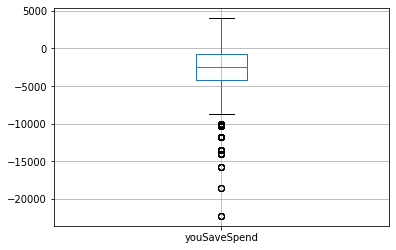

In [63]:
df[['youSaveSpend']].boxplot(figsize=(10,6));

Definición de valor atípico (outlier): https://es.wikipedia.org/wiki/Valor_at%C3%ADpico

In [70]:
stats.head()

count       mean       std   min       25%        50%  \
barrels08   37843.0  17.532506  4.575950  0.06  14.33087  17.347895   
barrelsA08  37843.0   0.216169  1.141527  0.00   0.00000   0.000000   
charge240   37843.0   0.023531  0.427647  0.00   0.00000   0.000000   
city08      37843.0  17.941389  6.660360  6.00  15.00000  17.000000   
city08U     37843.0   4.042737  9.645820  0.00   0.00000   0.000000   

                  75%         max       IQR  
barrels08   20.600625   47.087143  6.269755  
barrelsA08   0.000000   18.311667  0.000000  
charge240    0.000000   12.000000  0.000000  
city08      20.000000  138.000000  5.000000  
city08U      0.000000  138.304000  0.000000

In [64]:
outliers = pd.DataFrame(columns=stats.index)

outliers

Empty DataFrame
Columns: [barrels08, barrelsA08, charge240, city08, city08U, cityA08, cityA08U, cityCD, cityE, cityUF, co2, co2A, co2TailpipeAGpm, co2TailpipeGpm, comb08, comb08U, combA08, combA08U, combE, combinedCD, combinedUF, cylinders, displ, engId, feScore, fuelCost08, fuelCostA08, ghgScore, ghgScoreA, highway08, highway08U, highwayA08, highwayA08U, highwayCD, highwayE, highwayUF, hlv, hpv, id, lv2, lv4, pv2, pv4, range, rangeCity, rangeCityA, rangeHwy, rangeHwyA, UCity, UCityA, UHighway, UHighwayA, year, youSaveSpend, charge240b, phevCity, phevHwy, phevComb]
Index: []

In [74]:
for c in stats.index:
    
    iqr = stats.at[c, 'IQR']
    #print(f'Para el indice {c}, el valor de la columna IQR es: {iqr}')
    
    cut_off = 1.5 * iqr # test tukey
    #print(f'Valor de cut_off:  {cut_off}')
    
    lower = stats.at[c, '25%'] - cut_off
    upper = stats.at[c, '75%'] + cut_off
    #print(f'Valor de irq por arriba: {upper}, y por debajo: {lower}')
    
    res = df[(df[c] < lower) | (df[c] > upper)].copy()
    
    res['outliers'] = c
    
    outliers = outliers.append(res, sort=True)
    
outliers['outliers'].value_counts()

highway08U         7299
city08U            7299
comb08U            7299
engId              6677
lv2                6250
pv2                6239
co2                5854
ghgScore           5815
feScore            5815
hlv                4615
hpv                4614
city08             1470
UCity              1440
cityA08            1408
combA08            1408
highwayA08         1408
barrelsA08         1408
fuelCostA08        1372
UCityA             1362
UHighwayA          1362
lv4                1357
co2TailpipeAGpm    1353
highway08           996
comb08              969
UHighway            893
barrels08           864
cylinders           851
co2TailpipeGpm      830
cityA08U            740
highwayA08U         740
combA08U            740
fuelCost08          604
youSaveSpend        604
co2A                525
ghgScoreA           518
cityE               175
highwayE            175
combE               175
charge240           152
range               120
rangeCity            93
rangeHwy        

In [85]:
def get_outliers(stats:pd.DataFrame, threshold: float = 1.5)-> pd.DataFrame:
    '''
        Esta función recibe un dataframe del tipo df.describe().T
        
        Nos devuelve un dataframe con los outliers
        
        Params:
            stats = pd.DataFrame.describe().T
            threshold = float, con el umbral de tukey
        
        Return:
            pd.DataFrame
    
    '''
    
    outliers = pd.DataFrame(columns=stats.index)
    
    stats['IQR'] = stats['75%']-stats['25%']
    
    for c in stats.index:
        iqr = stats.at[c, 'IQR']
        
        cut_off = threshold * iqr 
        
        lower = stats.at[c, '25%'] - cut_off
        upper = stats.at[c, '75%'] + cut_off
        
        res = df[(df[c] < lower) | (df[c] > upper)].copy()
        
        res['outliers'] = c
        
        outliers = outliers.append(res, sort=True)
        
    return outliers

In [86]:
get_outliers(df.describe().T)

UCity  UCityA  UHighway  UHighwayA                       VClass  \
163    32.2222     0.0   46.1538        0.0         Small Station Wagons   
167    32.2222     0.0   46.1538        0.0         Small Station Wagons   
1028   33.0000     0.0   48.7179        0.0                 Compact Cars   
1231   33.0000     0.0   48.7179        0.0         Small Station Wagons   
1238   33.0000     0.0   48.7179        0.0         Small Station Wagons   
...        ...     ...       ...        ...                          ...   
20873  14.0000     0.0   23.1000        0.0                  Two Seaters   
20888  13.0000     0.0   22.2000        0.0              Subcompact Cars   
20938  14.7000     0.0   21.9000        0.0                 Midsize Cars   
21110  14.3000     0.0   21.2958        0.0   Standard Pickup Trucks 2WD   
21871  14.0000     0.0   20.1000        0.0  Sport Utility Vehicle - 4WD   

       barrels08  barrelsA08  charge240  charge240b city08  city08U cityA08  \
163    11.771786         0.0        0.0         0.0     25      0.0       0   
167    11.771786         0.0        0.0         0.0     25      0.0       0   
1028   11.365862         0.0        0.0         0.0     26      0.0       0   
1231   11.365862         0.0        0.0         0.0     26      0.0       0   
1238   11.365862         0.0        0.0         0.0     26      0.0       0   
...          ...         ...        ...         ...    ...      ...     ...   
20873  25.354615         0.0        0.0         0.0     11      0.0       0   
20888  25.354615         0.0        0.0         0.0     11      0.0       0   
20938  25.354615         0.0        0.0         0.0     12      0.0       0   
21110  25.354615         0.0        0.0         0.0     12      0.0       0   
21871  25.354615         0.0        0.0         0.0     11      0.0       0   

       cityA08U  cityCD  cityE  cityUF co2 co2A  co2TailpipeAGpm  \
163         0.0     0.0    0.0     0.0  -1   -1              0.0   
167         0.0     0.0    0.0     0.0  -1   -1              0.0   
1028        0.0     0.0    0.0     0.0  -1   -1              0.0   
1231        0.0     0.0    0.0     0.0  -1   -1              0.0   
1238        0.0     0.0    0.0     0.0  -1   -1              0.0   
...         ...     ...    ...     ...  ..  ...              ...   
20873       0.0     0.0    0.0     0.0  -1   -1              0.0   
20888       0.0     0.0    0.0     0.0  -1   -1              0.0   
20938       0.0     0.0    0.0     0.0  -1   -1              0.0   
21110       0.0     0.0    0.0     0.0  -1   -1              0.0   
21871       0.0     0.0    0.0     0.0  -1   -1              0.0   

       co2TailpipeGpm comb08  comb08U combA08  combA08U  combE  combinedCD  \
163        317.392857     28      0.0       0       0.0    0.0         0.0   
167        317.392857     28      0.0       0       0.0    0.0         0.0   
1028       306.448276     29      0.0       0       0.0    0.0         0.0   
1231       306.448276     29      0.0       0       0.0    0.0         0.0   
1238       306.448276     29      0.0       0       0.0    0.0         0.0   
...               ...    ...      ...     ...       ...    ...         ...   
20873      683.615385     13      0.0       0       0.0    0.0         0.0   
20888      683.615385     13      0.0       0       0.0    0.0         0.0   
20938      683.615385     13      0.0       0       0.0    0.0         0.0   
21110      683.615385     13      0.0       0       0.0    0.0         0.0   
21871      683.615385     13      0.0       0       0.0    0.0         0.0   

       combinedUF                     createdOn  cylinders  displ  \
163           0.0  Tue Jan 01 00:00:00 EST 2013        4.0    1.9   
167           0.0  Tue Jan 01 00:00:00 EST 2013        4.0    1.9   
1028          0.0  Tue Jan 01 00:00:00 EST 2013        4.0    1.9   
1231          0.0  Tue Jan 01 00:00:00 EST 2013        4.0    1.9   
1238          0.0  Tue Jan 01 00:00:00 EST 2013 

In [76]:
outliers.head()

UCity  UCityA  UHighway  UHighwayA                  VClass  barrels08  \
47    11.0     0.0      15.0        0.0                    Vans     32.961   
58    12.0     0.0      15.0        0.0                    Vans     32.961   
69    12.0     0.0      15.0        0.0                    Vans     32.961   
80    11.0     0.0      14.0        0.0                    Vans     32.961   
275   11.0     0.0      16.0        0.0  Standard Pickup Trucks     32.961   

     barrelsA08  charge240  charge240b city08  city08U cityA08  cityA08U  \
47          0.0        0.0         0.0      9      0.0       0       0.0   
58          0.0        0.0         0.0     10      0.0       0       0.0   
69          0.0        0.0         0.0     10      0.0       0       0.0   
80          0.0        0.0         0.0      9      0.0       0       0.0   
275         0.0        0.0         0.0      9      0.0       0       0.0   

     cityCD  cityE  cityUF co2 co2A  co2TailpipeAGpm  co2TailpipeGpm comb08  \
47      0.0    0.0     0.0  -1   -1              0.0           888.7     10   
58      0.0    0.0     0.0  -1   -1              0.0           888.7     10   
69      0.0    0.0     0.0  -1   -1              0.0           888.7     10   
80      0.0    0.0     0.0  -1   -1              0.0           888.7     10   
275     0.0    0.0     0.0  -1   -1              0.0           888.7     10   

     comb08U combA08  combA08U  combE  combinedCD  combinedUF  \
47       0.0       0       0.0    0.0         0.0         0.0   
58       0.0       0       0.0    0.0         0.0         0.0   
69       0.0       0       0.0    0.0         0.0         0.0   
80       0.0       0       0.0    0.0         0.0         0.0   
275      0.0       0       0.0    0.0         0.0         0.0   

                        createdOn  cylinders  displ             drive engId  \
47   Tue Jan 01 00:00:00 EST 2013        8.0    5.9  Rear-Wheel Drive  2890   
58   Tue Jan 01 00:00:00 EST 2013        8.0    5.2  Rear-Wheel Drive  2854   
69   Tue Jan 01 00:00:00 EST 2013        8.0    5.2  Rear-Wheel Drive  2850   
80   Tue Jan 01 00:00:00 EST 2013        8.0    5.9  Rear-Wheel Drive  2890   
275  Tue Jan 01 00:00:00 EST 2013        8.0    7.4  Rear-Wheel Drive  4880   

    feScore fuelCost08 fuelCostA08 fuelType         fuelType1 ghgScore  \
47       -1       3350           0  Regular  Regular Gasoline       -1   
58       -1       3350           0  Regular  Regular Gasoline       -1   
69       -1       3350           0  Regular  Regular Gasoline       -1   
80       -1       3350           0  Regular  Regular Gasoline       -1   
275      -1       3350           0  Regular  Regular Gasoline       -1   

    ghgScoreA highway08  highway08U highwayA08  highwayA08U  highwayCD  \
47         -1        11         0.0          0          0.0        0.0   
58         -1        11         0.0          0          0.0        0.0   
69         -1        11         0.0          0          0.0        0.0   
80         -1        10         0.0          0          0.0        0.0   
275        -1        12         0.0          0          0.0        0.0   

     highwayE  highwayUF hlv hpv     id lv2 lv4       make  \
47        0.0        0.0   0   0   1004   0   0      Dodge   
58        0.0        0.0   0   0   1005   0   0      Dodge   
69        0.0        0.0   0   0   1006   0   0      Dodge   
80        0.0        0.0   0   0   1007   0   0      Dodge   
275       0.0        0.0   0   0  10245   0   0  Chevrolet   

                   model                    modifiedOn mpgData   outliers  \
47   B150/B250 Wagon 2WD  Tue Jan 01 00:00:00 EST 2013       N  barrels08   
58        B350 Wagon 2WD  Tue Jan 01 00:00:00 EST 2013       N  barrels08   
69        B350 Wagon 2WD  Tue Jan 01 00:00:00 EST 2013       N  barrels08   
80        B350 Wagon 2WD  Tue Jan 01 00:00:00 EST 2013       N  barrels08   
275     C1500 Pickup 2WD  Tue Jan 01 00:00:00 EST 2013       N  barrels08   

    phevBlen

In [77]:
clean_index = [i for i in df.index if i not in outliers.index]

In [78]:
len(clean_index)

15826

In [79]:
clean_index[:10]

[0, 14, 25, 33, 34, 36, 41, 48, 49, 50]

In [80]:
df = df.iloc[clean_index]

<AxesSubplot:>

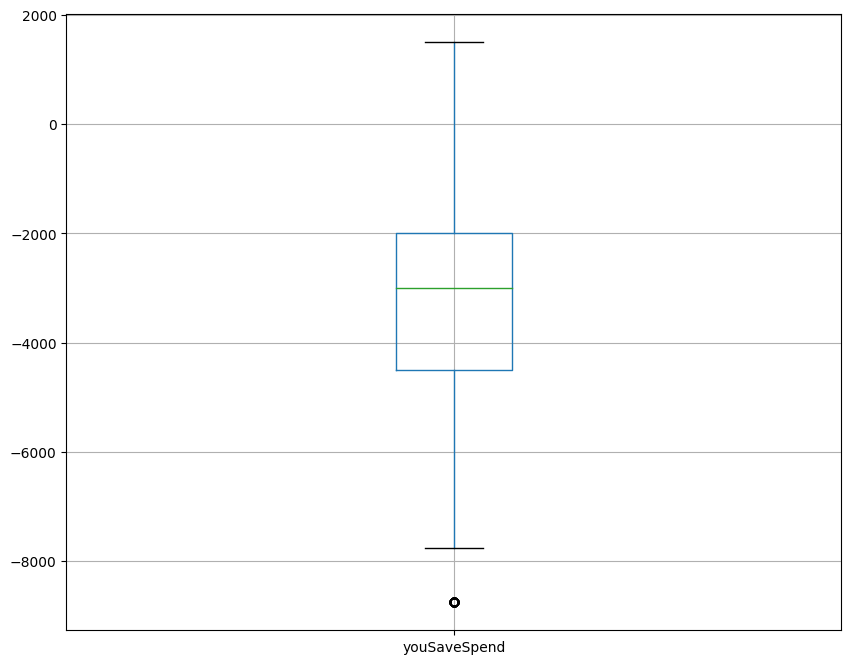

In [81]:
df[['youSaveSpend']].boxplot(figsize=(10,8));

*Debemos tener en cuenta que siempre habrá valores atípicos cuando filtremos nuestros datos, por lo que solamente eliminaremos los valores atípicos una sola vez, porque corremos el riesgo de quedarnos sin datos*

### Colinealidad  

Columnas con la misma información.

In [82]:
df.describe().T.tail()

count         mean          std     min     25%     50%  \
youSaveSpend  15826.0 -3269.382661  1942.630858 -8750.0 -4500.0 -3000.0   
charge240b    15826.0     0.000000     0.000000     0.0     0.0     0.0   
phevCity      15826.0     0.000000     0.000000     0.0     0.0     0.0   
phevHwy       15826.0     0.000000     0.000000     0.0     0.0     0.0   
phevComb      15826.0     0.000000     0.000000     0.0     0.0     0.0   

                 75%     max  
youSaveSpend -2000.0  1500.0  
charge240b       0.0     0.0  
phevCity         0.0     0.0  
phevHwy          0.0     0.0  
phevComb         0.0     0.0

In [ ]:
df.corr().head() # matriz de correlación, si vemos valores nulos es porque la varianza = 0

In [87]:
# columnas ctes

cte_cols = []

for c in df.select_dtypes(include=np.number):
    
    if df[c].std()==0:
        cte_cols.append(c)

cte_cols

['barrelsA08',
 'charge240',
 'city08U',
 'cityA08',
 'cityA08U',
 'cityCD',
 'cityE',
 'cityUF',
 'co2',
 'co2A',
 'co2TailpipeAGpm',
 'comb08U',
 'combA08',
 'combA08U',
 'combE',
 'combinedCD',
 'combinedUF',
 'feScore',
 'fuelCostA08',
 'ghgScore',
 'ghgScoreA',
 'highway08U',
 'highwayA08',
 'highwayA08U',
 'highwayCD',
 'highwayE',
 'highwayUF',
 'hlv',
 'hpv',
 'lv2',
 'pv2',
 'range',
 'rangeCity',
 'rangeCityA',
 'rangeHwy',
 'rangeHwyA',
 'UCityA',
 'UHighwayA',
 'charge240b',
 'phevCity',
 'phevHwy',
 'phevComb']

In [88]:
df = df.drop(columns=cte_cols, axis=1)

In [89]:
df.corr().head()

barrels08    city08  co2TailpipeGpm    comb08  cylinders  \
barrels08        1.000000 -0.935840        0.999924 -0.965057   0.752456   
city08          -0.935840  1.000000       -0.937527  0.978474  -0.762143   
co2TailpipeGpm   0.999924 -0.937527        1.000000 -0.966472   0.751149   
comb08          -0.965057  0.978474       -0.966472  1.000000  -0.734803   
cylinders        0.752456 -0.762143        0.751149 -0.734803   1.000000   

                   displ     engId  fuelCost08  highway08        id       lv4  \
barrels08       0.811195  0.334149    0.906536  -0.946340 -0.277004 -0.494244   
city08         -0.773316 -0.248730   -0.896854   0.913950  0.217473  0.434854   
co2TailpipeGpm  0.808564  0.331649    0.907626  -0.947367 -0.276026 -0.493842   
comb08         -0.770583 -0.283664   -0.899173   0.966833  0.249145  0.503210   
cylinders       0.893613  0.202649    0.743396  -0.659226 -0.118378 -0.214922   

                phevBlended       pv4     UCity  UHighway      year  \
barrels08               NaN -0.507704 -0.936078 -0.946854 -0.336651   
city08                  NaN  0.438006  0.995096  0.915621  0.244842   
co2TailpipeGpm          NaN -0.507292 -0.937719 -0.947844 -0.334723   
comb08                  NaN  0.511801  0.982339  0.968447  0.292453   
cylinders               NaN -0.203536 -0.761925 -0.660051 -0.126428   

                youSaveSpend  
barrels08          -0.906536  
city08              0.896854  
co2TailpipeGpm     -0.907626  
comb08              0.899173  
cylinders          -0.743396

In [90]:
df = df.drop('phevBlended', axis=1)

In [91]:
df.corr()

barrels08    city08  co2TailpipeGpm    comb08  cylinders  \
barrels08        1.000000 -0.935840        0.999924 -0.965057   0.752456   
city08          -0.935840  1.000000       -0.937527  0.978474  -0.762143   
co2TailpipeGpm   0.999924 -0.937527        1.000000 -0.966472   0.751149   
comb08          -0.965057  0.978474       -0.966472  1.000000  -0.734803   
cylinders        0.752456 -0.762143        0.751149 -0.734803   1.000000   
displ            0.811195 -0.773316        0.808564 -0.770583   0.893613   
engId            0.334149 -0.248730        0.331649 -0.283664   0.202649   
fuelCost08       0.906536 -0.896854        0.907626 -0.899173   0.743396   
highway08       -0.946340  0.913950       -0.947367  0.966833  -0.659226   
id              -0.277004  0.217473       -0.276026  0.249145  -0.118378   
lv4             -0.494244  0.434854       -0.493842  0.503210  -0.214922   
pv4             -0.507704  0.438006       -0.507292  0.511801  -0.203536   
UCity           -0.936078  0.995096       -0.937719  0.982339  -0.761925   
UHighway        -0.946854  0.915621       -0.947844  0.968447  -0.660051   
year            -0.336651  0.244842       -0.334723  0.292453  -0.126428   
youSaveSpend    -0.906536  0.896854       -0.907626  0.899173  -0.743396   

                   displ     engId  fuelCost08  highway08        id       lv4  \
barrels08       0.811195  0.334149    0.906536  -0.946340 -0.277004 -0.494244   
city08         -0.773316 -0.248730   -0.896854   0.913950  0.217473  0.434854   
co2TailpipeGpm  0.808564  0.331649    0.907626  -0.947367 -0.276026 -0.493842   
comb08         -0.770583 -0.283664   -0.899173   0.966833  0.249145  0.503210   
cylinders       0.893613  0.202649    0.743396  -0.659226 -0.118378 -0.214922   
displ           1.000000  0.318462    0.731681  -0.725560 -0.184873 -0.344553   
engId           0.318462  1.000000    0.191931  -0.308985 -0.665628 -0.207619   
fuelCost08      0.731681  0.191931    1.000000  -0.847852 -0.158322 -0.356980   
highway08      -0.725560 -0.308985   -0.847852   1.000000  0.278540  0.575015   
id             -0.184873 -0.665628   -0.158322   0.278540  1.000000  0.121153   
lv4            -0.344553 -0.207619   -0.356980   0.575015  0.121153  1.000000   
pv4            -0.345721 -0.236461   -0.348485   0.592531  0.144707  0.941640   
UCity          -0.774135 -0.251193   -0.896298   0.917545  0.219670  0.437701   
UHighway       -0.727258 -0.311190   -0.848015   0.997583  0.278187  0.576278   
year           -0.213554 -0.808185   -0.184159   0.342686  0.732990  0.208671   
youSaveSpend   -0.731681 -0.191931   -1.000000   0.847852  0.158322  0.356980   

                     pv4     UCity  UHighway      year  youSaveSpend  
barrels08      -0.507704 -0.936078 -0.946854 -0.336651     -0.906536  
city08          0.438006  0.995096  0.915621  0.244842      0.896854  
co2TailpipeGpm -0.507292 -0.937719 -0.947844 -0.334723     -0.907626  
comb08          0.511801  0.982339  0.968447  0.292453      0.899173  
cylinders      -0.203536 -0.761925 -0.660051 -0.126428     -0.743396  
displ          -0.345721 -0.774135 -0.727258 -0.213554     -0.731681  
engId          -0.236461 -0.251193 -0.311190 -0.808185     -0.191931  
fuelCost08     -0.348485 -0.896298 -0.848015 -0.184159     -1.000000  
highway08       0.592531  0.917545  0.997583  0.342686      0.847852  
id              0.144707  0.219670  0.278187  0.732990      0.158322  
lv4             0.941640  0.437701  0.576278  0.208671      0.356980  
pv4             1.000000  0.440830  0.593742  0.243771      0.348485  
UCity           0.440830  1.000000  0.919718  0.246220      0.896298  
UHighway        0.593742  0.919718  1.000000  0.343314      0.848015  
year            0.243771  0.246220  0.343314  1.000000      0.184159  
youSaveSpend    0.348485  0.896298  0.848015  0.184159      1.000000

In [96]:
# criterio de colianelidad

colineales = []

for c in df._get_numeric_data(): # para cada columna numerica ...
    
    for i in range(len(df.corr())): # vamos a recorrer la matriz de correlación ..
        
        if abs(df.corr()[c][i])>0.9 and abs(df.corr()[c][i])<1: # el umbral es arbitrario, abs es el valor absoluto del dato
            #print(f'Columna que estay explorando: {c} ')
            
            #print(f'Valor de la matriz de correlación: {df.corr()[c][i]}')
            colineales.append(c)


colineales = list(set(colineales))

len(colineales)

0

In [93]:
colineales

['lv4',
 'pv4',
 'UHighway',
 'comb08',
 'city08',
 'UCity',
 'youSaveSpend',
 'highway08',
 'barrels08',
 'fuelCost08',
 'co2TailpipeGpm']

In [94]:
df = df.drop(columns=colineales, axis=1)

In [95]:
df.head()

cylinders  displ              drive  engId fuelType         fuelType1  \
0         4.0    2.0   Rear-Wheel Drive   9011  Regular  Regular Gasoline   
14        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
25        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
33        8.0    4.6  Front-Wheel Drive   4620  Premium  Premium Gasoline   
34        8.0    4.9  Front-Wheel Drive   4640  Premium  Premium Gasoline   

       id        make                model mpgData            trany  \
0       1  Alfa Romeo   Spider Veloce 2000       Y     Manual 5-spd   
14   1001       Dodge  B150/B250 Wagon 2WD       N  Automatic 3-spd   
25   1002       Dodge  B150/B250 Wagon 2WD       N     Manual 4-spd   
33  10027    Cadillac              Seville       Y  Automatic 4-spd   
34  10028    Cadillac              Seville       N  Automatic 4-spd   

          VClass  year                     createdOn  \
0    Two Seaters  1985  Tue Jan 01 00:00:00 EST 2013   
14          Vans  1985  Tue Jan 01 00:00:00 EST 2013   
25          Vans  1985  Tue Jan 01 00:00:00 EST 2013   
33  Midsize Cars  1993  Tue Jan 01 00:00:00 EST 2013   
34  Midsize Cars  1993  Tue Jan 01 00:00:00 EST 2013   

                      modifiedOn  
0   Tue Jan 01 00:00:00 EST 2013  
14  Tue Jan 01 00:00:00 EST 2013  
25  Tue Jan 01 00:00:00 EST 2013  
33  Tue Jan 01 00:00:00 EST 2013  
34  Tue Jan 01 00:00:00 EST 2013

In [97]:
df.shape, dim_original

((15826, 15), (37843, 83))

### Limpieza columna `trany`

In [98]:
df.trany.value_counts()

Automatic 4-spd                     6334
Manual 5-spd                        3216
Automatic 5-spd                     1347
Automatic 3-spd                      959
Manual 4-spd                         888
Manual 6-spd                         788
Automatic (S6)                       737
Automatic (S5)                       492
Automatic 6-spd                      401
Automatic (variable gear ratios)     202
Automatic 7-spd                      129
Automatic (S4)                       127
Manual 3-spd                          76
Automatic (S7)                        50
Automatic (S8)                        44
Auto(AV-S6)                           11
Auto(AM6)                              6
Automatic (AV-S6)                      6
Auto(L4)                               2
Auto(L3)                               2
Automatic 8-spd                        2
Auto(AM7)                              2
unknown                                1
Automatic (AM6)                        1
Automatic (AV)  

In [103]:
# una de la muchas maneras que podemos hacerlo

df.trany = df.trany.str.replace('-', '')

df.trany = df.trany.str.replace('Automatic', 'Auto')

df.trany = df.trany.str.replace('Auto\(', 'Auto')

df.trany = df.trany.str.replace('Manual\(', 'Manual')

df.trany = df.trany.str.replace('\(', '')

df.trany.unique()

array(['Manual 5spd', 'Auto 3spd', 'Manual 4spd', 'Auto 4spd',
       'Manual 3spd', 'Manual 6spd', 'Auto 5spd', 'Auto S4)', 'Auto S5)',
       'Auto variable gear ratios)', 'Auto 6spd', 'Auto S6)', 'Auto 7spd',
       'Auto S7)', 'Auto S8)', 'unknown', 'Auto AM6)', 'AutoAM6)',
       'Auto AVS6)', 'AutoL4)', 'AutoL3)', 'Auto AV)', 'AutoAVS6)',
       'Auto AVS8)', 'Auto 8spd', 'AutoAM7)'], dtype=object)

In [104]:
#y esta es otra más rápida y que hay que escribir menos
df.trany[df.trany.str.startswith('Au')] = 'AUTO'
df.trany[df.trany.str.startswith('Ma')] = 'MANUAL'

In [105]:
df.trany.value_counts()

AUTO       10857
MANUAL      4968
unknown        1
Name: trany, dtype: int64

In [106]:
df[df['trany']=='unknown']

cylinders  displ          drive  engId fuelType         fuelType1  \
19128        6.0    4.1  2-Wheel Drive   4852  Regular  Regular Gasoline   

          id make           model mpgData    trany  \
19128  27381  GMC  C25 Pickup 2WD       N  unknown   

                           VClass  year                     createdOn  \
19128  Standard Pickup Trucks 2WD  1984  Tue Jan 01 00:00:00 EST 2013   

                         modifiedOn  
19128  Tue Jan 01 00:00:00 EST 2013

In [107]:
df.drop(df[df.trany=='unknown'].index, axis=0, inplace=True)

In [108]:
df.trany.value_counts()

AUTO      10857
MANUAL     4968
Name: trany, dtype: int64

In [109]:
df.head()

cylinders  displ              drive  engId fuelType         fuelType1  \
0         4.0    2.0   Rear-Wheel Drive   9011  Regular  Regular Gasoline   
14        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
25        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
33        8.0    4.6  Front-Wheel Drive   4620  Premium  Premium Gasoline   
34        8.0    4.9  Front-Wheel Drive   4640  Premium  Premium Gasoline   

       id        make                model mpgData   trany        VClass  \
0       1  Alfa Romeo   Spider Veloce 2000       Y  MANUAL   Two Seaters   
14   1001       Dodge  B150/B250 Wagon 2WD       N    AUTO          Vans   
25   1002       Dodge  B150/B250 Wagon 2WD       N  MANUAL          Vans   
33  10027    Cadillac              Seville       Y    AUTO  Midsize Cars   
34  10028    Cadillac              Seville       N    AUTO  Midsize Cars   

    year                     createdOn                    modifiedOn  
0   1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
14  1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
25  1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
33  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
34  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013

## DataFrame Final

In [113]:
df.reset_index(drop=True, inplace=True)

In [114]:
df.head()

cylinders  displ              drive  engId fuelType         fuelType1  \
0        4.0    2.0   Rear-Wheel Drive   9011  Regular  Regular Gasoline   
1        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
2        8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
3        8.0    4.6  Front-Wheel Drive   4620  Premium  Premium Gasoline   
4        8.0    4.9  Front-Wheel Drive   4640  Premium  Premium Gasoline   

      id        make                model mpgData   trany        VClass  year  \
0      1  Alfa Romeo   Spider Veloce 2000       Y  MANUAL   Two Seaters  1985   
1   1001       Dodge  B150/B250 Wagon 2WD       N    AUTO          Vans  1985   
2   1002       Dodge  B150/B250 Wagon 2WD       N  MANUAL          Vans  1985   
3  10027    Cadillac              Seville       Y    AUTO  Midsize Cars  1993   
4  10028    Cadillac              Seville       N    AUTO  Midsize Cars  1993   

                      createdOn                    modifiedOn  
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013

In [120]:
df.to_csv('data/vehicles_messy_clean.csv', index=False)

In [121]:
pd.read_csv('data/vehicles_messy_clean.csv')

cylinders  displ              drive  engId fuelType         fuelType1  \
0            4.0    2.0   Rear-Wheel Drive   9011  Regular  Regular Gasoline   
1            8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
2            8.0    5.2   Rear-Wheel Drive   2850  Regular  Regular Gasoline   
3            8.0    4.6  Front-Wheel Drive   4620  Premium  Premium Gasoline   
4            8.0    4.9  Front-Wheel Drive   4640  Premium  Premium Gasoline   
...          ...    ...                ...    ...      ...               ...   
15820        8.0    5.2   Rear-Wheel Drive   2854  Regular  Regular Gasoline   
15821        4.0    1.9  Front-Wheel Drive   4107  Regular  Regular Gasoline   
15822        4.0    1.9  Front-Wheel Drive   4104  Regular  Regular Gasoline   
15823        4.0    1.9  Front-Wheel Drive   4107  Regular  Regular Gasoline   
15824        4.0    1.9  Front-Wheel Drive   4104  Regular  Regular Gasoline   

          id        make                model mpgData   trany        VClass  \
0          1  Alfa Romeo   Spider Veloce 2000       Y  MANUAL   Two Seaters   
1       1001       Dodge  B150/B250 Wagon 2WD       N    AUTO          Vans   
2       1002       Dodge  B150/B250 Wagon 2WD       N  MANUAL          Vans   
3      10027    Cadillac              Seville       Y    AUTO  Midsize Cars   
4      10028    Cadillac              Seville       N    AUTO  Midsize Cars   
...      ...         ...                  ...     ...     ...           ...   
15820    999       Dodge  B150/B250 Wagon 2WD       N    AUTO          Vans   
15821   9991      Saturn                   SL       Y    AUTO  Compact Cars   
15822   9992      Saturn                   SL       Y    AUTO  Compact Cars   
15823   9993      Saturn                   SL       Y  MANUAL  Compact Cars   
15824   9994      Saturn                   SL       Y  MANUAL  Compact Cars   

       year                     createdOn                    modifiedOn  
0      1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
1      1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
2      1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
3      1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
4      1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
...     ...                           ...                           ...  
15820  1985  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
15821  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
15822  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
15823  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  
15824  1993  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013  

[15825 rows x 15 columns]

In [122]:
df.shape, dim_original

((15825, 15), (37843, 83))

**Cuidado de no eliminarlo todo....**